In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('train.csv', sep=',')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_nulls = pd.Series(data.isnull().sum(),name='nulls').to_frame()
df_nulls['%'] = ((df_nulls['nulls'] / data.shape[0]) * 100).round(2)
df_nulls.sort_values(by='%', ascending=False, inplace=True)
df_nulls

,nulls,%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
...,...,...
MoSold,0,0.00
YrSold,0,0.00
SaleType,0,0.00
SaleCondition,0,0.00


In [4]:
#poolQC variable
data['PoolQC'] = data['PoolQC'].fillna("No Pool")

#MiscFeature variable
data['MiscFeature'] = data['MiscFeature'].fillna("None")

#Alley variable
data['Alley'] = data['Alley'].fillna("No alley access")

#Fence variable
data['Fence'] = data['Fence'].fillna("No Fence")

#MasVnrType variable
data['MasVnrType'] = data['MasVnrType'].fillna("None")

#FireplaceQu
data['FireplaceQu'] = data['FireplaceQu'].fillna("No Fireplace")

#BsmtQual
data['BsmtQual'] = data['BsmtQual'].fillna("No Basement")

#BsmtCond
data['BsmtCond'] = data['BsmtCond'].fillna("No Basement")

#BsmtCond
data['BsmtExposure'] = data['BsmtExposure'].fillna("No Basement")

#BsmtFinType1
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("No Basement")

#BsmtFinType2
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("No Basement")

#GarageType
data['GarageType'] = data['GarageType'].fillna("No Garage")

#GarageFinish
data['GarageFinish'] = data['GarageFinish'].fillna("No Garage")

#GarageFinish
data['GarageFinish'] = data['GarageFinish'].fillna("No Garage")

#GarageQual
data['GarageQual'] = data['GarageQual'].fillna("No Garage")

#GarageCond
data['GarageCond'] = data['GarageCond'].fillna("No Garage")

In [5]:
data.drop(columns='Id', inplace=True)

In [6]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()

# numeric columns operations

In [7]:
data.select_dtypes(include=[np.number]).describe(include='all')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
threshold = 10
categorical_like = [col for col in data.select_dtypes(include="number").columns
                    if data[col].nunique() < threshold]
print(categorical_like)
for col in categorical_like:
    data[col] = data[col].astype("category")

numeric_columns = [col for col in numeric_columns if col not in categorical_like]
categorical_columns.extend(categorical_like)

['OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']


In [9]:
unique_counts = data[numeric_columns].nunique().to_frame(name="n_uniques")
unique_counts

,n_uniques
MSSubClass,15
LotFrontage,110
LotArea,1073
OverallQual,10
YearBuilt,112
YearRemodAdd,61
MasVnrArea,327
BsmtFinSF1,637
BsmtFinSF2,144
BsmtUnfSF,780


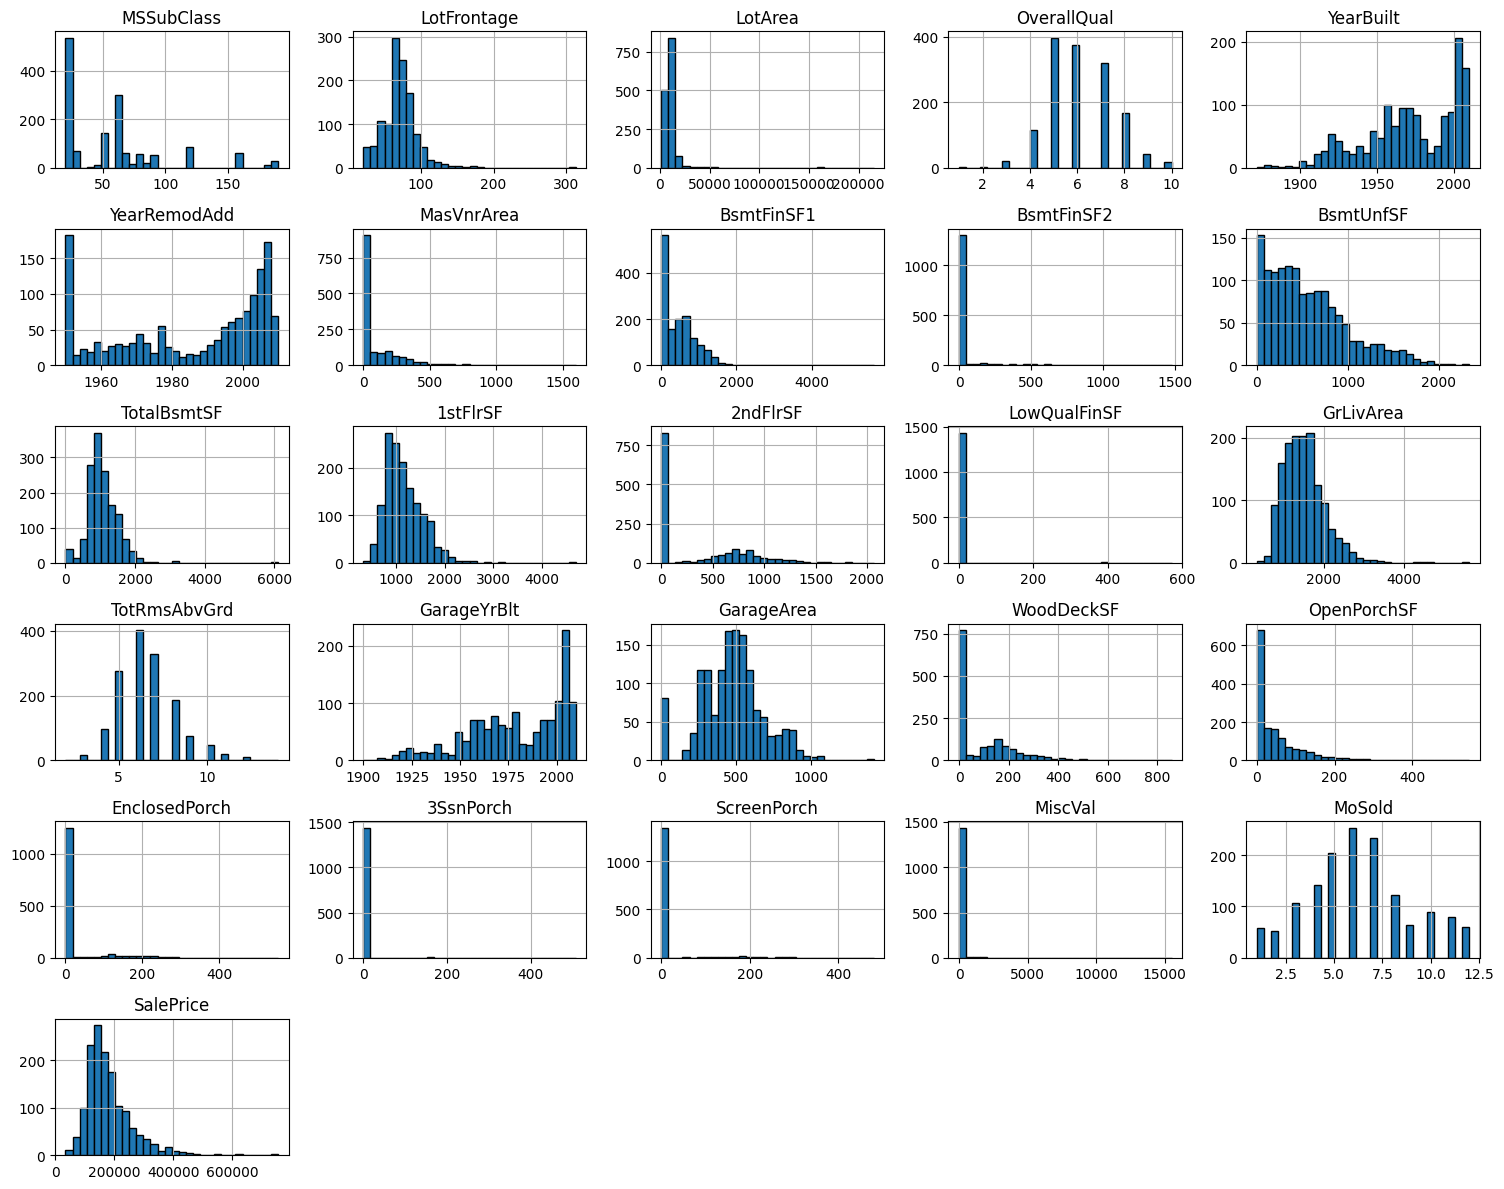

In [10]:
data[numeric_columns].hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

In [11]:
numeric_nan_frame = pd.Series(data[numeric_columns].isna().sum(),name='num_Nan').to_frame()
numeric_nan_frame = numeric_nan_frame[numeric_nan_frame["num_Nan"] > 0]
numeric_nan_frame

,num_Nan
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


In [12]:
# data[numeric_nan_frame.index].hist(figsize=(8, 5), bins=30, edgecolor="black")
# plt.tight_layout()
# plt.show()

In [13]:
data['GarageYrBlt'].replace(np.nan, data['GarageYrBlt'].median(), inplace=True)
data['MasVnrArea'].replace(np.nan, data['MasVnrArea'].median(), inplace=True)
data['LotFrontage'].replace(np.nan, data['LotFrontage'].median(), inplace=True)


C:\Users\amitb\AppData\Local\Temp\ipykernel_21564\2045418643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GarageYrBlt'].replace(np.nan, data['GarageYrBlt'].median(), inplace=True)
C:\Users\amitb\AppData\Local\Temp\ipykernel_21564\2045418643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [14]:
print(numeric_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice']


# categorical columns operations

In [15]:
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']


In [16]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [17]:

# ExterQual > should be numeric (cat ordinal 1 > 5)

exterqual_mapping = {
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["ExterQual"] = data["ExterQual"].map(exterqual_mapping)

# ExterCond > should be numeric (cat ordinal 1>5)

extercond_mapping = {
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["ExterCond"] = data["ExterCond"].map(extercond_mapping)

# BsmtQual > should be numeric (cat ordinal 1>5)

bsmtqual_mapping = {
    'No Basement': 0,  # No Basement
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["BsmtQual"] = data["BsmtQual"].map(bsmtqual_mapping)

# BsmtCond > should be numeric (cat ordinal 1>5)

BsmtCond_mapping = {
    "No Basement": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["BsmtCond"] = data["BsmtCond"].map(BsmtCond_mapping)

# BsmtExposure > should be numeric (cat ordinal 1>5)

bsmtexposure_mapping = {
    "No Basement": 0,   # No Basement
    "No": 1,   # No Exposure
    "Mn": 2,   # Minimum Exposure
    "Av": 3,   # Average Exposure
    "Gd": 4    # Good Exposure
}

data["BsmtExposure"] = data["BsmtExposure"].map(bsmtexposure_mapping)

# BsmtFinType1 > should be numeric (cat ordinal 1>5)

bsmtfintype1_mapping = {
    "No Basement": 0,
    "Unf": 1,
    "LwQ": 2,
    "Rec": 3,
    "BLQ": 4,
    "ALQ": 5,
    "GLQ": 6
}

data["BsmtFinType1"] = data["BsmtFinType1"].map(bsmtfintype1_mapping)

# BsmtFinType2 > should be numeric (cat ordinal 1>5)

bsmtfintype2_mapping = {
    "No Basement": 0,
    "Unf": 1,
    "LwQ": 2,
    "Rec": 3,
    "BLQ": 4,
    "ALQ": 5,
    "GLQ": 6
}

data["BsmtFinType2"] = data["BsmtFinType2"].map(bsmtfintype2_mapping)

# HeatingQC > should be numeric (cat ordinal 1>5)

heatingqc_mapping = {
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["HeatingQC"] = data["HeatingQC"].map(heatingqc_mapping)

# Electrical > should be numeric (cat ordinal 1>5)

electrical_mapping = {
    "FuseP": 1,   # Poor
    "FuseF": 2,   # Fair
    "FuseA": 3,   # Average
    "SBrkr": 4,   # Standard breakers (best)
    "Mix": 3      # or set as 3/NA if unsure
}

data["Electrical"] = data["Electrical"].map(electrical_mapping)

# KitchenQual > should be numeric (cat ordinal 1>5)

kitchenqual_mapping = {
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["KitchenQual"] = data["KitchenQual"].map(kitchenqual_mapping)

# Functional > should be numeric (cat ordinal 1>5)

functional_mapping = {
    "Sal": 1,
    "Sev": 2,
    "Maj2": 3,
    "Maj1": 4,
    "Mod": 5,
    "Min2": 6,
    "Min1": 7,
    "Typ": 8
}

data["Functional"] = data["Functional"].map(functional_mapping)

# FireplaceQu > should be numeric (cat ordinal 1>5)

fireplacequ_mapping = {
    "No Fireplace": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["FireplaceQu"] = data["FireplaceQu"].map(fireplacequ_mapping)

# GarageType > should be numeric (cat ordinal 1>5)

garage_type_mapping = {
    "No Garage": 0,
    "CarPort": 1,
    "Detchd": 2,
    "Basment": 3,
    "Attchd": 4,
    "BuiltIn": 5,
    "2Types": 6
}

data["GarageType"] = data["GarageType"].map(garage_type_mapping)

# GarageFinish > should be numeric (cat ordinal 1>5)

garagefinish_mapping = {
    "No Garage": 0,
    "Unf": 1,
    "RFn": 2,
    "Fin": 3
}

data["GarageFinish"] = data["GarageFinish"].map(garagefinish_mapping)

# GarageQual > should be numeric (cat ordinal 1>5)

garagequal_mapping = {
    "No Garage": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["GarageQual"] = data["GarageQual"].map(garagequal_mapping)

# GarageCond > should be numeric (cat ordinal 1>5)

garagecond_mapping = {
    "No Garage": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

data["GarageCond"] = data["GarageCond"].map(garagecond_mapping)

# PoolQC > should be numeric (cat ordinal 1>5)

poolqc_mapping = {
    "No Pool": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}

data["PoolQC"] = data["PoolQC"].map(poolqc_mapping)

# Fence > should be numeric (cat ordinal 1>5)

fence_mapping = {
    "No Fence": 0,
    "MnWw": 1,
    "MnPrv": 2,
    "GdWo": 3,
    "GdPrv": 4
}

data["Fence"] = data["Fence"].map(fence_mapping)

# SaleType > nominal categorical


le = LabelEncoder()
data["SaleType"] = le.fit_transform(data["SaleType"])
data["SaleCondition"] = le.fit_transform(data["SaleCondition"])
data["Utilities"] = le.fit_transform(data["Utilities"])




In [18]:
unique_counts = data[categorical_columns].nunique().to_frame(name="n_uniques")
unique_counts

,n_uniques
MSZoning,5
Street,2
Alley,3
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9


In [19]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
data[cat_cols] = data[cat_cols].astype('category')

In [ ]:
# data.to_csv('test_processed.csv',index=False)

## Correlations

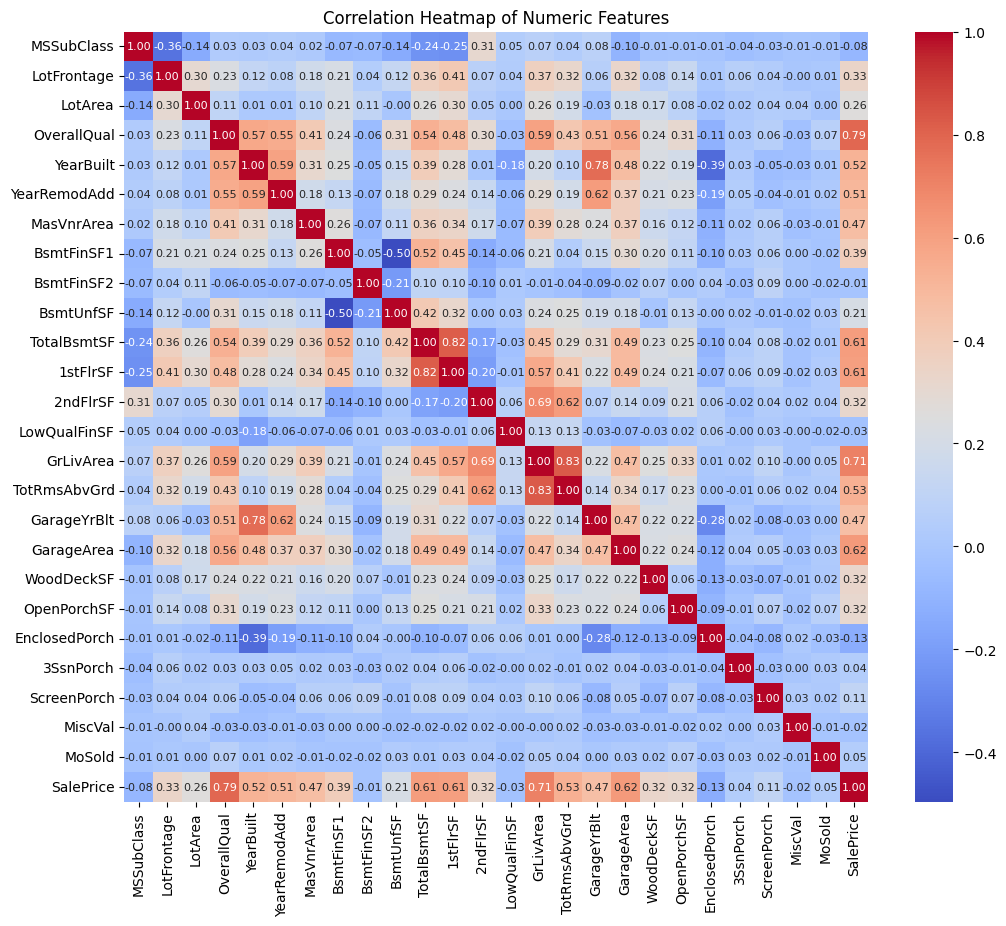

In [26]:

# 4. Compute the correlation matrix
corr_matrix = data[numeric_columns].corr()

# 5. Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,annot_kws={"size":8} )
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Saleprice

In [ ]:
plt.boxplot(data['SalePrice'])

In [ ]:
plt.hist(data['SalePrice'])